Version 1

Getting Basic Stock Data 

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def fetch_stock_data(stock_code, days):
    end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
    start_date = (pd.Timestamp.today() - pd.DateOffset(days=days)).strftime('%Y-%m-%d')
    data = yf.download(stock_code, start=start_date, end=end_date)
    return data

def plot_stock_data(data):
    plt.plot(data.index, data['Close'])
    plt.title('Stock Price Chart')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()


[*********************100%***********************]  1 of 1 completed


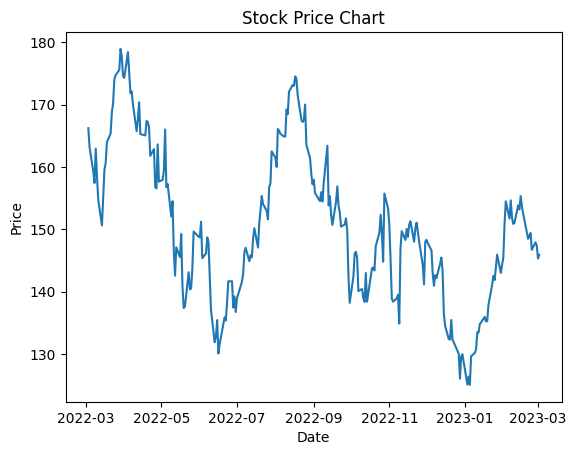

In [2]:
# Example usage
stock_code = 'AAPL'
days = 365
stock_data = fetch_stock_data(stock_code, days)
plot_stock_data(stock_data)

Version 2

Training linear regression model on this time series data and call model for specified time frame

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression

In [4]:
def fetch_stock_data(stock_code, num_days):
    """Function to fetch stock data using yfinance."""
    end_date = pd.Timestamp.now()
    start_date = end_date - pd.Timedelta(days=num_days)
    stock_data = yf.download(stock_code, start=start_date, end=end_date)
    return stock_data

def train_and_save_model(stock_code, stock_data):
    """Function to train and save the linear regression model."""
    lr_model = LinearRegression()
    X = np.array(range(len(stock_data))).reshape(-1, 1)
    Y = stock_data['Close'].values.reshape(-1, 1)
    lr_model.fit(X, Y)
    print(f"Slope: {lr_model.coef_[0][0]}")
    print(f"Intercept: {lr_model.intercept_[0]}")
    print(f"Equation: y = {lr_model.intercept_[0]} + {lr_model.coef_[0][0]}x")
    model_name = f"{stock_code}_LR.pkl"
    with open(model_name, 'wb') as f:
        pickle.dump(lr_model, f)

def load_and_plot_model(stock_code, num_days):
    """Function to load and plot the saved linear regression model."""
    model_name = f"{stock_code}_LR.pkl"
    with open(model_name, 'rb') as f:
        lr_model = pickle.load(f)
    stock_data = fetch_stock_data(stock_code, num_days)
    X = np.array(range(len(stock_data))).reshape(-1, 1)
    Y = stock_data['Close'].values.reshape(-1, 1)
    plt.plot(X, Y)
    plt.plot(X, lr_model.predict(X))
    plt.title(f"{stock_code} Stock Price and Linear Regression")
    plt.xlabel("Days")
    plt.ylabel("Closing Price")
    plt.show()


[*********************100%***********************]  1 of 1 completed
Slope: -0.0832246926368651
Intercept: 160.87615411780496
Equation: y = 160.87615411780496 + -0.0832246926368651x
[*********************100%***********************]  1 of 1 completed


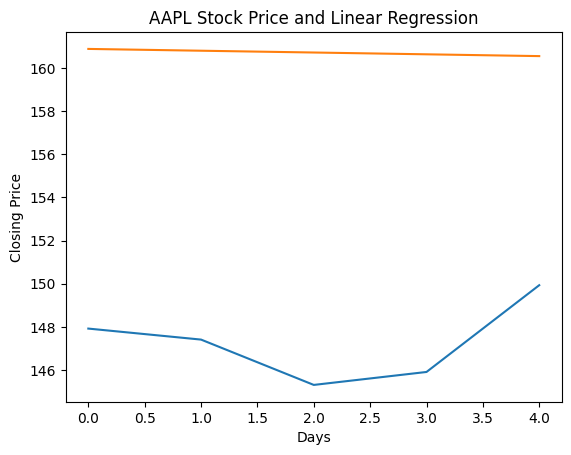

In [8]:
# Example usage
stock_code = "AAPL"
train_num_days = 365
call_num_days = 5
stock_data = fetch_stock_data(stock_code, num_days)
train_and_save_model(stock_code, stock_data)
load_and_plot_model(stock_code, call_num_days)

Version 3

Training linear regression model on this time series data and call model for specified time frame

Doing EDA and accuracy check on it

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

In [11]:
def fetch_stock_data(stock_code, num_days):
    """Function to fetch stock data using yfinance."""
    end_date = pd.Timestamp.now()
    start_date = end_date - pd.Timedelta(days=num_days)
    stock_data = yf.download(stock_code, start=start_date, end=end_date)
    return stock_data

def eda(stock_data, stock_code):
    """Function to perform exploratory data analysis on stock data."""
    print(f"\nExploratory Data Analysis for {stock_code}:\n")
    print(stock_data.head())
    print("\n")
    print(stock_data.tail())
    print("\n")
    print(stock_data.describe())
    print("\n")
    plt.figure(figsize=(10, 6))
    plt.title(f"{stock_code} Closing Price Distribution")
    sns.histplot(data=stock_data, x='Close', kde=True)
    plt.show()

def calculate_accuracy(lr_model, X, Y):
    """Function to calculate the accuracy of the linear regression model."""
    Y_pred = lr_model.predict(X)
    accuracy = r2_score(Y, Y_pred) * 100
    return accuracy

def train_and_save_model(stock_code, stock_data):
    """Function to train and save the linear regression model."""
    lr_model = LinearRegression()
    X = np.array(range(len(stock_data))).reshape(-1, 1)
    Y = stock_data['Close'].values.reshape(-1, 1)
    lr_model.fit(X, Y)
    print(f"Slope: {lr_model.coef_[0][0]}")
    print(f"Intercept: {lr_model.intercept_[0]}")
    print(f"Equation: y = {lr_model.intercept_[0]} + {lr_model.coef_[0][0]}x")
    model_name = f"{stock_code}_LR.pkl"
    with open(model_name, 'wb') as f:
        pickle.dump(lr_model, f)
    eda(stock_data, stock_code)
    accuracy = calculate_accuracy(lr_model, X, Y)
    print(f"Accuracy: {accuracy:.2f}%")

def load_and_plot_model(stock_code, num_days):
    """Function to load and plot the saved linear regression model."""
    model_name = f"{stock_code}_LR.pkl"
    with open(model_name, 'rb') as f:
        lr_model = pickle.load(f)
    stock_data = fetch_stock_data(stock_code, num_days)
    X = np.array(range(len(stock_data))).reshape(-1, 1)
    Y = stock_data['Close'].values.reshape(-1, 1)
    plt.plot(X, Y)
    plt.plot(X, lr_model.predict(X))
    plt.title(f"{stock_code} Stock Price and Linear Regression")
    plt.xlabel("Days")
    plt.ylabel("Closing Price")
    plt.show()


[*********************100%***********************]  1 of 1 completed
Slope: -0.08320429692479155
Intercept: 160.87446127370288
Equation: y = 160.87446127370288 + -0.08320429692479155x

Exploratory Data Analysis for AAPL:

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-04  164.490005  165.550003  162.100006  163.169998  162.187515   
2022-03-07  163.360001  165.020004  159.039993  159.300003  158.340820   
2022-03-08  158.820007  162.880005  155.800003  157.440002  156.492020   
2022-03-09  161.479996  163.410004  159.410004  162.949997  161.968842   
2022-03-10  160.199997  160.389999  155.979996  158.520004  157.565521   

               Volume  
Date                   
2022-03-04   83737200  
2022-03-07   96418800  
2022-03-08  131148300  
2022-03-09   91454900  
2022-03-10  105342000  


                  Open        High         Low       Close   Adj Close  \
Date           

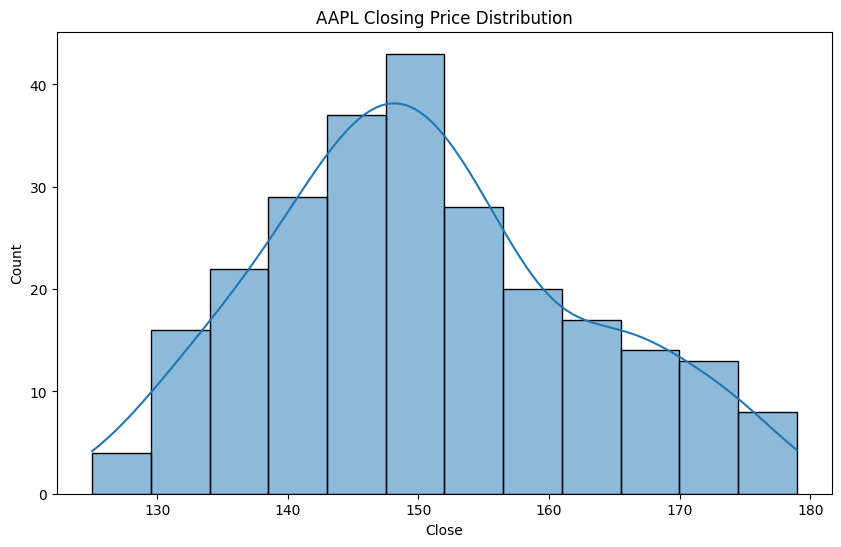

Accuracy: 25.22%
[*********************100%***********************]  1 of 1 completed


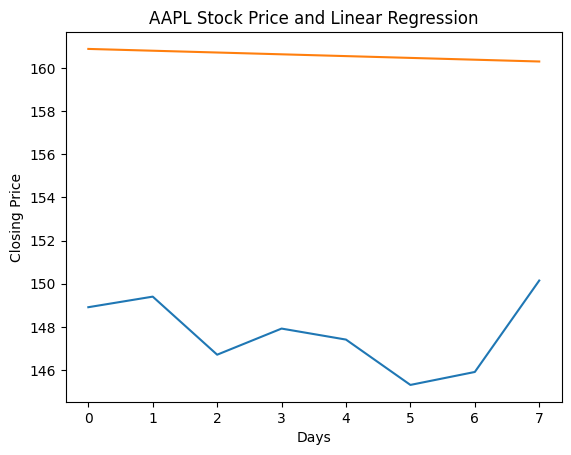

In [13]:
# Example usage
stock_code = "AAPL"
train_num_days = 365
call_num_days = 10
stock_data = fetch_stock_data(stock_code, num_days)
train_and_save_model(stock_code, stock_data)
load_and_plot_model(stock_code, call_num_days)